<a href="https://colab.research.google.com/github/farrukh61/CCPP-Power-Output-Prediction/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
dtr = DecisionTreeRegressor()
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
df = pd.read_csv('ccpp_data.csv')

# Data Visulization

In [ ]:
!pip list | grep mlxtend

mlxtend                       0.14.0


In [ ]:
#Essenlibraies for data import

import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import scatterplotmatrix, heatmap

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


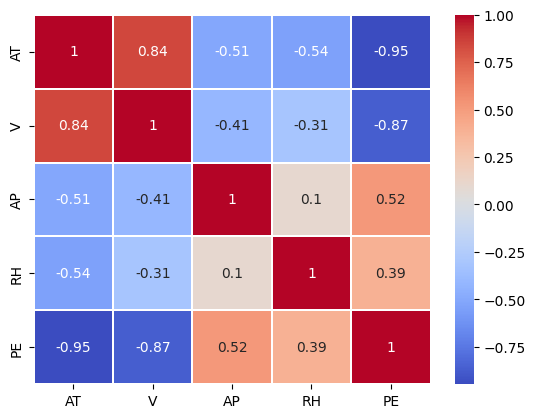

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot= True,linewidths=.05);

Position of missing values


<Axes: >

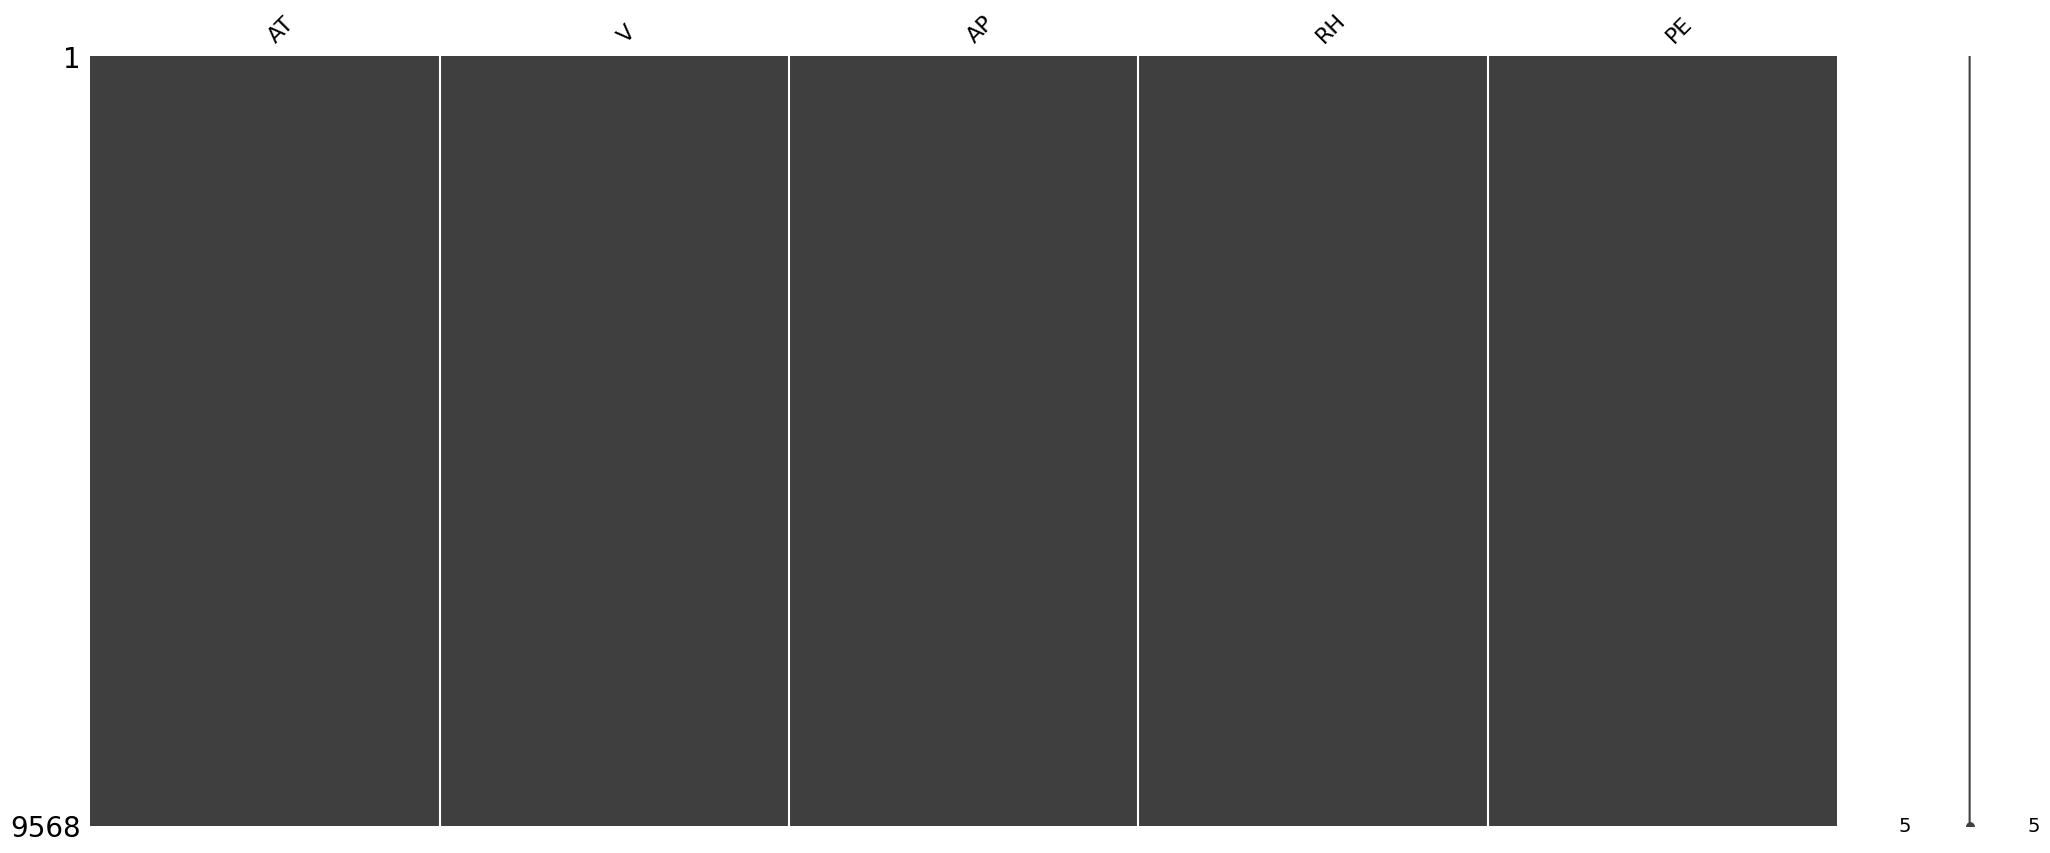

In [ ]:
# Look for missing data
print("Position of missing values")
msno.matrix(df)

In [ ]:
print("Data Shape: ",df.shape,'\n')

# Data Type
print("Data Type: ",'\n',df.dtypes,'\n')

Data Shape:  (9568, 5) 

Data Type:  
 AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object 



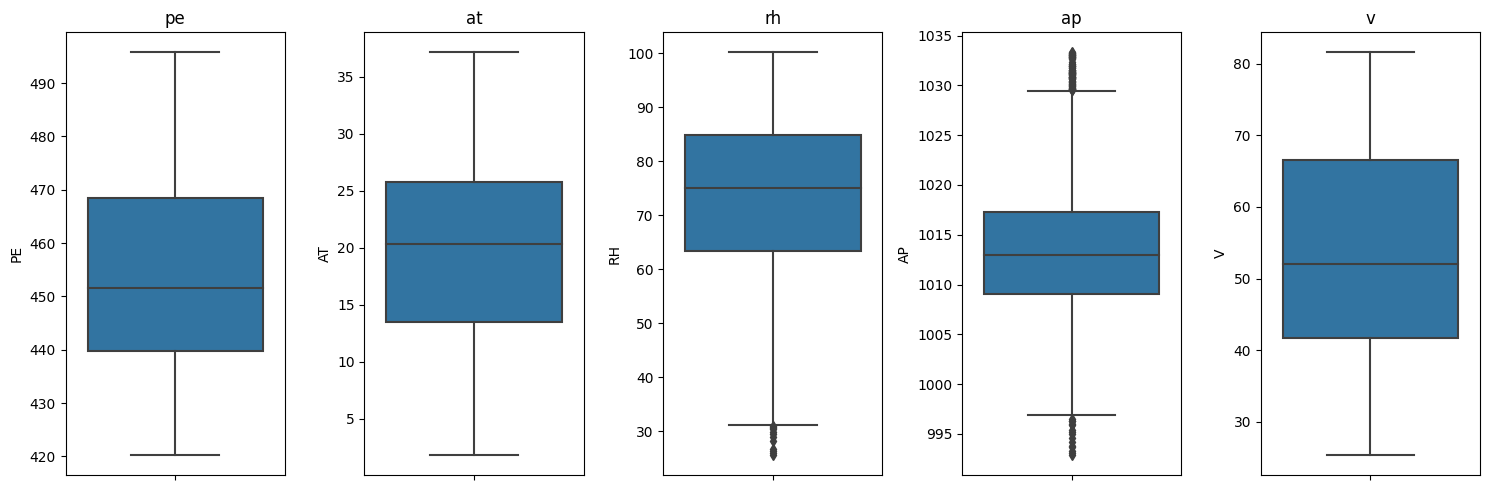

In [ ]:
# boxplot
def boxResults(dft):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

  # plot a boxplot for each feature on a separate axis
  sns.boxplot(y=dft['PE'], ax=axes[0])
  sns.boxplot(y=dft['AT'], ax=axes[1])
  sns.boxplot(y=dft['RH'], ax=axes[2])
  sns.boxplot(y=dft['AP'], ax=axes[3])
  sns.boxplot(y=dft['V'], ax=axes[4])

  # set the titles for each subplot
  axes[0].set_title('pe')
  axes[1].set_title('at')
  axes[2].set_title('rh')
  axes[3].set_title('ap')
  axes[4].set_title('v')

  # display the plot
  plt.tight_layout()
  plt.show()

boxResults(df)

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Preprocessing

In [ ]:
#Essenlibraies for preprocessing


In [ ]:
df2 = df.copy()

In [ ]:
# finding the outliers
print("finding out outliers")

Outliers = []

for cols in df.columns:
  print()
  print("The col name is:", cols)
  if df[cols].dtype != 'object':
    
    qar1 = df2[cols].quantile(0.25)
    qar3 = df2[cols].quantile(0.75)
    iqr = qar3 - qar1
    LowerBound = qar1 - (1.5*iqr)
    UpperBound = qar3 + (1.5*iqr)
    Outliers = df2[(df2[cols] < LowerBound) | (df2[cols] > UpperBound)] 
    
    indexesToBeDeleted = list(Outliers.index)
    print(indexesToBeDeleted)
    df2 = df2.drop(labels=indexesToBeDeleted)

    # if len(Outliers) > 0:
    #   print(Outliers)
    #   print("The above outlier cols is ",cols)
    #   print()


finding out outliers

The col name is: AT
[]

The col name is: V
[]

The col name is: AP
[238, 319, 368, 536, 571, 631, 669, 715, 753, 810, 847, 983, 1091, 1250, 1290, 1388, 1583, 1660, 1808, 2003, 2060, 2298, 2372, 2395, 2447, 2481, 2579, 2761, 2972, 2977, 2989, 3015, 3021, 3066, 3213, 3412, 3443, 3483, 3492, 3766, 3796, 3955, 4067, 4125, 4202, 4327, 4697, 4793, 4928, 5006, 5067, 5431, 5529, 5690, 5706, 5805, 5840, 5863, 5928, 5956, 6006, 6346, 6581, 6708, 6789, 6829, 6925, 7077, 7186, 7320, 7485, 7623, 7807, 7892, 8098, 8104, 8133, 8270, 8379, 8411, 8462, 8568, 9060, 9068, 9159, 9267, 9342, 9366]

The col name is: RH
[789, 2262, 3603, 4367, 6472, 7983, 8061, 8751, 9015, 9074]

The col name is: PE
[]


In [ ]:
print("Outliers removed", df2.shape)

print(df2.describe())

boxResults(df2)

Outliers removed (9470, 5)
             AT         V        AP        RH        PE
count 9470.0000 9470.0000 9470.0000 9470.0000 9470.0000
mean    19.7209   54.4141 1013.1484   73.3131  454.2079
std      7.4273   12.7013    5.7044   14.5627   17.0290
min      1.8100   25.3600  996.8700   30.8300  420.2600
25%     13.5800   41.7400 1009.0900   63.2700  439.6925
50%     20.5000   52.7200 1012.9000   74.9800  451.2100
75%     25.7600   66.5400 1017.1700   84.8375  468.1875
max     37.1100   81.5600 1029.4100  100.1600  495.7600


NameError: name 'boxResults' is not defined

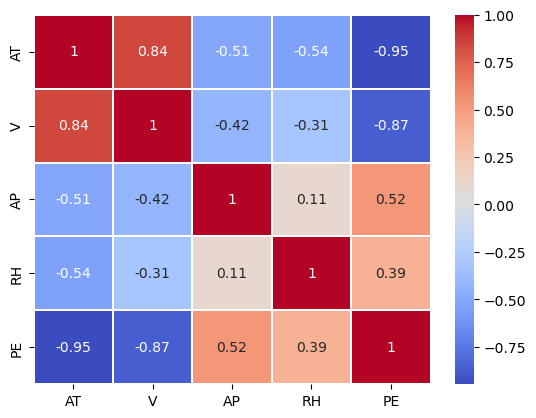

In [ ]:
corr = df2.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot= True,linewidths=.05);

In [ ]:
# for i in range(9568):
#   try:  
#     if df2._get_value(i, 'AP') > 99:
#       df2.at[i, 'AP'] = df2._get_value(i, 'AP') / 100
#   except KeyError:
#     pass

# for i in range(9568):
#   try:  
#     decimal_places = len(str(df2._get_value(i, 'AP')).split('.')[1])
#     #print(decimal_places)
#     if decimal_places > 3:
#       df2.at[i, 'AP'] = round(df2._get_value(i, 'AP'), 3)
#   except KeyError:
#     pass


In [ ]:
df2

,AT,V,AP,RH,PE
0,14.9600,41.7600,1024.0700,73.1700,463.2600
1,25.1800,62.9600,1020.0400,59.0800,444.3700
2,5.1100,39.4000,1012.1600,92.1400,488.5600
3,20.8600,57.3200,1010.2400,76.6400,446.4800
4,10.8200,37.5000,1009.2300,96.6200,473.9000
...,...,...,...,...,...
9563,16.6500,49.6900,1014.0100,91.0000,460.0300
9564,13.1900,39.1800,1023.6700,66.7800,469.6200
9565,31.3200,74.3300,1012.9200,36.4800,429.5700
9566,24.4800,69.4500,1013.8600,62.3900,435.7400


# Splitting and AutoScalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df2.drop('PE',axis=1)
y = df2['PE']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=300, shuffle=True)

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

# Model Tranning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
xs_train

array([[ 5.36124350e-01,  4.40111348e-01, -5.18600893e-01,
         1.11587647e+00],
       [-5.37963535e-01, -8.34818741e-01,  1.89927342e+00,
         3.44992974e-01],
       [-3.08663874e-01, -9.01671954e-01,  2.29386760e-01,
         5.98622689e-02],
       ...,
       [ 1.00813301e+00,  1.50818973e+00, -4.89897078e-01,
         8.78800157e-05],
       [-1.83330548e+00, -1.21234277e+00,  5.46817186e-01,
         1.27390072e+00],
       [ 1.98648797e-02,  3.51235901e-01,  6.37994011e-01,
         9.90831198e-01]])

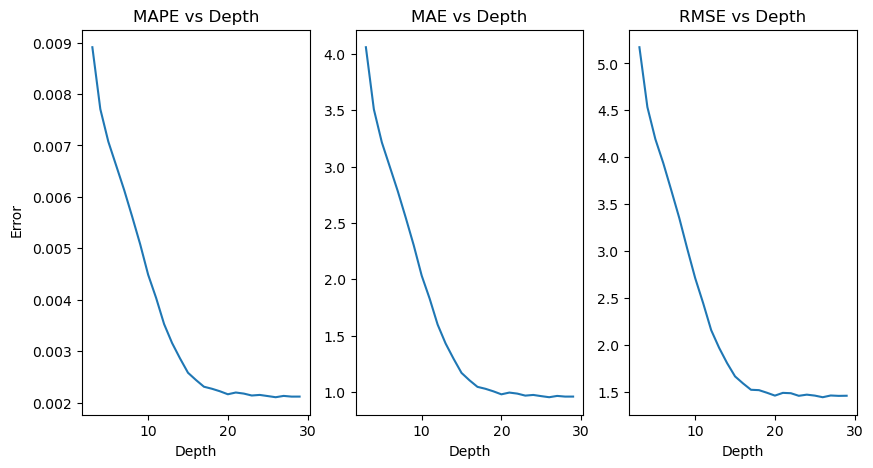

In [ ]:

depth = np.arange(3,30)
MAPE = []
MAE = []
RMSE = []

for i in depth:
    RF = RandomForestRegressor(n_estimators=10, max_depth=i, max_features='sqrt', random_state=42)
    LL_dt = RF.fit(xs_train,y_train)
    ytrain_pred = LL_dt.predict(xs_train)
    mean_abs_per_err = mape(y_train,ytrain_pred)
    mean_abs_err = mean_absolute_error(y_train,ytrain_pred)
    rmse = np.sqrt(mean_squared_error(y_train,ytrain_pred))
    MAPE.append(mean_abs_per_err)
    MAE.append(mean_abs_err)
    RMSE.append(rmse)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
# Add a common y-axis label
fig.text(0.06, 0.5, 'Error', ha='center', va='center', rotation='vertical')

# Plot MAPE values
ax1.plot(depth, MAPE)
ax1.set_xlabel('Depth')

ax1.set_title('MAPE vs Depth')

# Plot MAE values
ax2.plot(depth, MAE)
ax2.set_xlabel('Depth')

ax2.set_title('MAE vs Depth')

# Plot RMSE values
ax3.plot(depth, RMSE)
ax3.set_xlabel('Depth')

ax3.set_title('RMSE vs Depth')

# Display the plot
plt.show()




## before depth is set upto 20, but we have not achieved palteu value yet so we need to show that . so we need to increase the depth range
# also i think we need to evalue the model at the train data set 

In [ ]:
# model evaluation at depth 20
RFV2 = RandomForestRegressor(n_estimators=10, max_depth=20, max_features='sqrt', random_state=42)
RFV2.fit(xs_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=10,
                      random_state=42)

# Results

In [ ]:
def evaluate(model,train_features, train_labels, test_features, test_labels):  #feature -> x and label -> y
    
    
    pred_labels_train = model.predict(train_features)
    mean_abs_per_err_train = mape(train_labels,pred_labels_train)
    mean_abs_err_train = mean_absolute_error(train_labels,pred_labels_train)
    rmse_train = np.sqrt(mean_squared_error(train_labels,pred_labels_train))
#     print('Train Score\nMAPE = ',mean_abs_per_err_train)
#     print('MAE = ',mean_abs_err_train)
#     print('RMSE = ',rmse_train)
    
    
    
    
    
    
    pred_labels_test = model.predict(test_features)
    mean_abs_per_err_test = mape(test_labels,pred_labels_test)
    mean_abs_err_test = mean_absolute_error(test_labels,pred_labels_test)
    rmse_test = np.sqrt(mean_squared_error(test_labels,pred_labels_test))
#     print('\n\nTest Score\nMAPE = ',mean_abs_per_err_test)
#     print('MAE = ',mean_abs_err_test)
#     print('RMSE = ',rmse_test)
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#     # Train error plot
#     train_error_values = [mean_abs_per_err_train, mean_abs_err_train, rmse_train]
#     metrics = ["MAPE", "MAE", "RMSE"]
#     sns.barplot(x=metrics, y=train_error_values, ax=ax1)
#     ax1.set_title("Train Errors")
#     ax1.set_ylim(bottom=0)
#     ax1.set_ylabel("Error Value")
    
#     # Add value labels to train error bars
#     for i, value in enumerate(train_error_values):
#         ax1.text(i, value, f"{value:.3f}", ha="center", va="bottom")
    
#     # Test error plot
#     test_error_values = [mean_abs_per_err_test, mean_abs_err_test, rmse_test]
#     metrics = ["MAPE", "MAE", "RMSE"]
#     sns.barplot(x=metrics, y=test_error_values, ax=ax2)
#     ax2.set_title("Test Errors")
#     ax2.set_ylim(bottom=0)
# #     ax2.set_ylabel("Error Value")
    
#     # Add value labels to test error bars
#     for i, value in enumerate(test_error_values):
#         ax2.text(i, value, f"{value:.3f}", ha="center", va="bottom")
    
#     plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))

    # Train error bars
    train_error_values = [mean_abs_per_err_train, mean_abs_err_train, rmse_train]
    train_metrics = ["MAPE", "MAE", "RMSE"]
    train_pos = np.arange(len(train_metrics))
    ax.bar(train_pos - 0.2, train_error_values, width=0.4, label="Train Errors")
    
    # Add value labels to train error bars
    for i, value in enumerate(train_error_values):
        ax.text(train_pos[i]-0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Test error bars
    test_error_values = [mean_abs_per_err_test, mean_abs_err_test, rmse_test]
    test_metrics = ["MAPE", "MAE", "RMSE"]
    test_pos = np.arange(len(train_metrics))
    ax.bar(test_pos + 0.2, test_error_values, width=0.4, label="Test Errors")
    
    # Add value labels to test error bars
    for i, value in enumerate(test_error_values):
        ax.text(test_pos[i]+0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Set axis labels and legend
    ax.set_xticks(range(len(train_metrics)))
    ax.set_xticklabels(train_metrics)
    ax.set_title("Train and Test Errors")
    ax.set_ylabel("Error Value")
    ax.legend()
    
    plt.show()
                
                    
                                
            
    
    
    
    
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    
    sns.distplot(train_labels, hist=False, color="r", label="Ground Truth",ax=ax1)
    sns.distplot(pred_labels_train, hist=False, color="b", label="Predicted Values" , ax=ax1)
    ax1.set_title('Train Data')
    ax1.legend()
    sns.distplot(test_labels, hist=False, color="r", label="Ground Truth", ax=ax2)
    sns.distplot(pred_labels_test, hist=False, color="b", label="Predicted Values" , ax=ax2)
    ax2.set_title('Test Data')
    ax2.legend()

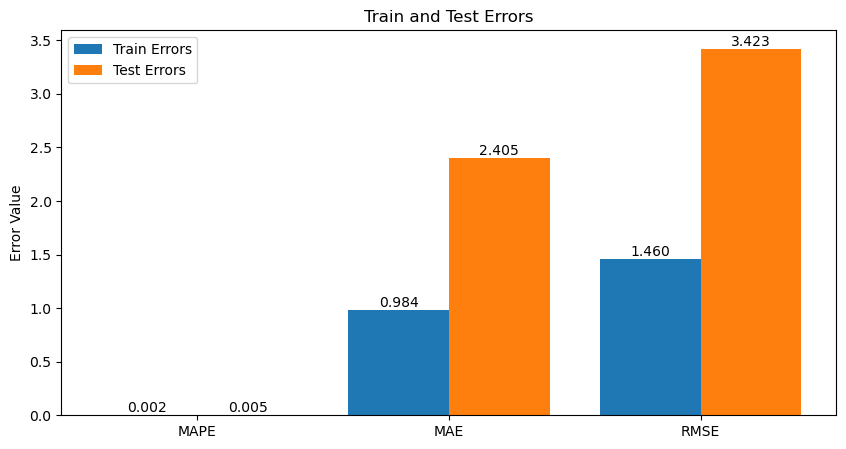

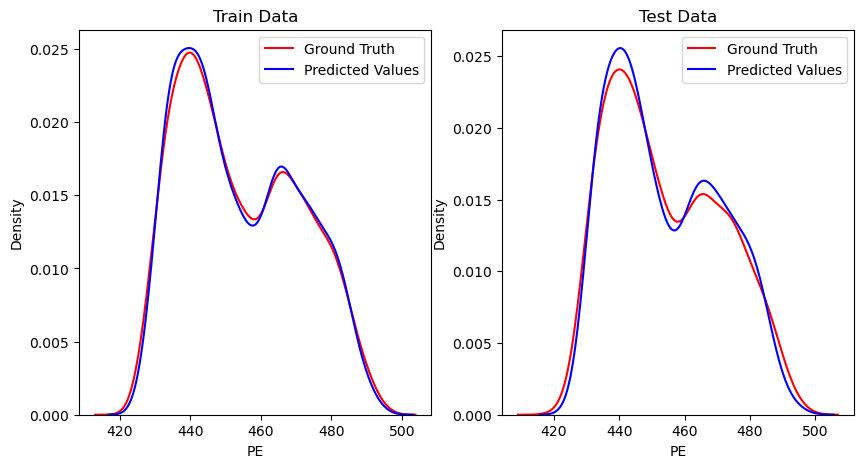

In [ ]:
evaluate(RFV2,xs_train,y_train,xs_test,y_test)

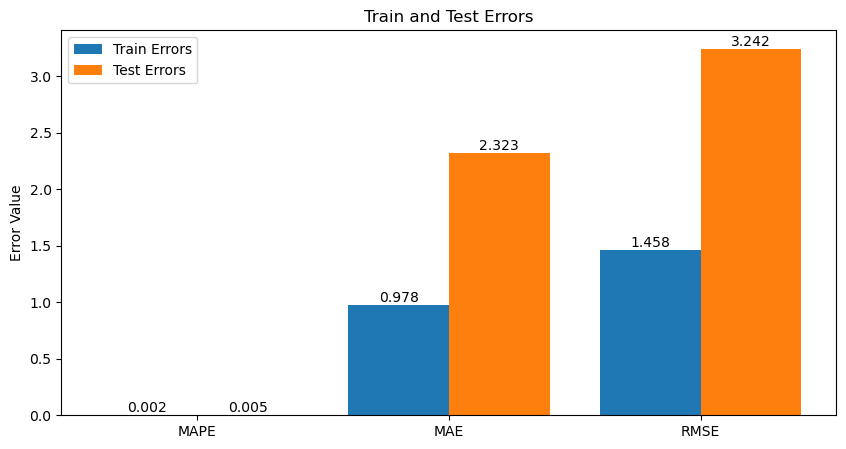

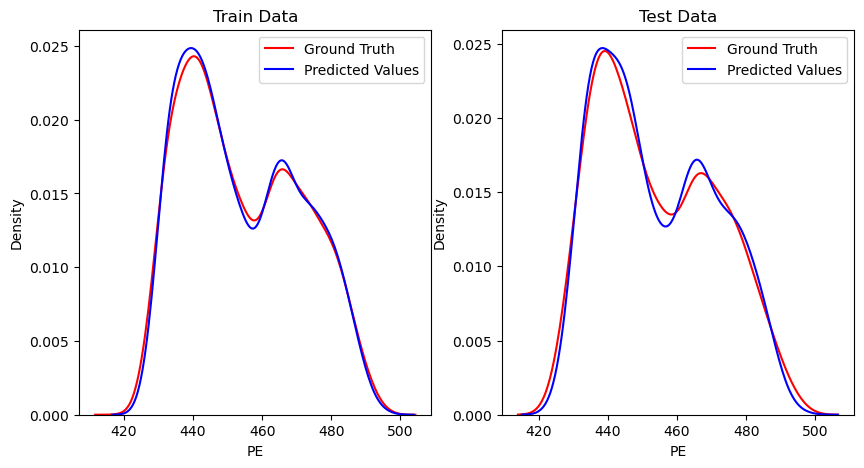

In [ ]:
# Results without outlier removal
evaluate(RFV2,xs_train,y_train,xs_test,y_test)